In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import regex
import string
import spacy
from spacy import displacy
from tqdm import tqdm
from textblob import TextBlob
from autocorrect import Speller
import nltk
from nltk.metrics import distance
from nltk.tokenize import word_tokenize
import gensim
import gensim.downloader as api
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Occurence\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [ ]:
##Importing the dataset
df = pd.read_json("Data/Clean_Database.json")
df.head()

,Title_1,Title_2,Title_3,Title_4,Corpus
0,PROJECT SCOPE MANAGEMENT,,,,Project Scope Management includes the process...
1,PROJECT SCOPE MANAGEMENT,Plan Scope Management,,,Plan Scope Management is the process of creat...
2,PROJECT SCOPE MANAGEMENT,Plan Scope Management,Inputs,Project charter,Described in Section 4.1.3.1. The project cha...
3,PROJECT SCOPE MANAGEMENT,Plan Scope Management,Inputs,Project management plan,Described in Section 4.2.3.1. Project managem...
4,PROJECT SCOPE MANAGEMENT,Plan Scope Management,Inputs,Enterprise environmental factors,The enterprise environmental factors that can...


In [ ]:
df["Title_1"] = df["Title_1"].astype(str)
df["Title_2"] = df["Title_2"].astype(str)
df["Title_3"] = df["Title_3"].astype(str)
df["Title_4"] = df["Title_4"].astype(str)
df["Corpus"] = df["Corpus"].astype(str)

In [ ]:
df.shape

(216, 5)

In [ ]:
df["Title_1"].unique()

array([' PROJECT SCOPE MANAGEMENT ', ' PROJECT SCHEDULE MANAGEMENT',
       ' PROJECT COST MANAGEMENT '], dtype=object)

In [ ]:
df.iloc[1,4]

' Plan Scope Management is the process of creating a scope management plan that documents how the project and  product scope will be deﬁned, validated, and controlled. The key beneﬁt of this process is that it provides guidance and  direction on how scope will be managed throughout the project. This process is performed once or at predeﬁned points  in the project. The inputs, tools and techniques, and outputs of this process are depicted in Figure 5-2. Figure 5-3 depicts  the data ﬂow diagram of the process. Plan Scope Management Inputs Tools & Techniques Outputs .1 Project charter .1 Expert judgment .1 Scope management plan .2 Project management plan .2 Data analysis .2 Requirements management   • Quality management plan • Alternatives analysis   plan • Project life cycle description .3 Meetings • Development approach .3 Enterprise environmental      factors .4 Organizational process assets Figure 5-2. Plan Scope Management: Inputs, Tools & Techniques, and Outputs 4.1 Develop Project 

### Data cleaning

In [ ]:
def cleaning_corpus(text):
    text = regex.sub(r"PMBOK®", "PMBOK guide", text)
    text = regex.sub(r"[\d.]","",text)
    text = regex.sub(r"["+string.punctuation+"]", " ", text)
    text = regex.sub(r"•", "", text)
    text = regex.sub(r"–|’|“|”|−", " ", text)
    text = regex.sub(r"—", " ", text)
    text = regex.sub(r"ﬂow", "Flow", text)
    text = regex.sub(r"Peronjetct|Psroject|PRreosjoeucrt|Pleroject|PPrroojjeecctt|Ptroject|ePrnotjesct", "Project", text)
    text = regex.sub(r"Conﬁguration", "configuration", text)
    text = regex.sub(r"Managemententent|Managementent", "Management", text)
    text = regex.sub(r"Multicriteria", "Multiple criteria", text)
    text = regex.sub(r"(ents){1,}", "s", text)
    text = regex.sub(r"(s){1,}", "s", text)
    text = regex.sub(r"Requirem|Requirementents|Requiremsents|Requirementss", "Requirements", text)
    text = regex.sub(r"Requirementss|requirems", "Requirements", text)
    text = regex.sub(r"requirems", "requires", text)
    text = regex.sub(r"Agreems", "Agreements", text)
    text = regex.sub(r"Compons", "Components", text)
    text = regex.sub(r"Asumption", "Assumption", text)
    text = regex.sub(r"Asuming", "Assuming", text)
    text = regex.sub(r"Lesons", "Lessons", text)
    text = regex.sub(r"docums|Docum|Documentent", "Document", text)
    text = regex.sub(r"Docum(ent){1,}", "Document", text)
    text = regex.sub(r"Elems", "Elements", text)
    text = regex.sub(r"Procurems", "Procurements", text)
    text = regex.sub(r"Asociate", "Associate", text)
    text = regex.sub(r"Asigned", "Assigned", text)
    text = regex.sub(r"Asesment", "Assesment", text)
    text = regex.sub(r"Activitie", "Activities", text)
    text = regex.sub(r"Activities(s){1,}", "Activities", text)
    text = regex.sub(r"Preapproved", "Accepted", text)
    text = regex.sub(r"Duratio|Duratio(n){1,}s|Durations(n){1,}s", "Durations", text)
    text = regex.sub(r"Duration(sn){1,}(n){0,}(s){0,}", "Durations", text)
    text = regex.sub(r"Pesimistic", "Pessimistic", text)
    text = regex.sub(r"Regardles", "Regardless", text)
    text = regex.sub(r"Schedu", "Schedule", text)
    text = regex.sub(r"Schedu(le){1,}", "Schedule", text)
    text = regex.sub(r"Scheduleling", "Scheduling", text)
    text = regex.sub(r"ctee acmal eansdsaigrnsms|ChIanntegegr Caotendtrol", "", text)
    text = regex.sub(r"Adjustms", "Adjustments", text)
    text = regex.sub(r"Compresion", "Compression", text)
    text = regex.sub(r"Reestimate", "estimate again", text)
    text = regex.sub(r"nuUnanimity", "Unanimity", text)
    text = regex.sub(r"nuPlurality", "Plurality", text)
    text = regex.sub(r"nuEVM", "EVM", text)
    text = regex.sub(r"nuWBS", "WBS", text)
    text = regex.sub(r"evs", "EVS", text)
    text = regex.sub(r"metres", "meters", text)
    text = regex.sub(r"cscahleenddualers", "schedulers", text)
    text = regex.sub(r"disbursems", "disbursement", text)
    text = regex.sub(r"multicriteria", "multi-criteria", text)
    text = regex.sub(r"managementplan", "management plan", text)
    text = regex.sub(r"Reprioritizing", "prioritizing again", text)
    text = regex.sub(r"nuNonfunctional|Nonfunctional","Non functional", text)
    text = regex.sub(r"cancelled", "canceled", text)
    text = regex.sub(r"subcompons", "subcomponents", text)
    text = regex.sub(r"nuAssumptions", "Assumptions", text)
    text = regex.sub(r"impedims", "impediment", text)
    text = regex.sub(r"analyses", "analysis", text)
    text = regex.sub(r"ﬂ", "fl", text)
    text = regex.sub(r"ﬁ", "fi", text)
    text = regex.sub(r"\n", "", text)
    text = regex.sub(r"\s{2,}", " ", text)
    text = regex.sub(r"^\s","",text)
    text = Speller()(text)
    return text
clean_corpus = lambda x:cleaning_corpus(x)

def cleaning_titles(text):
    text = text.capitalize()
    text = regex.sub(r"[\d.]","",text)
    text = regex.sub(r"["+string.punctuation+"]", " ", text)
    text = regex.sub(r"^\s{1,}","",text)
    text = regex.sub(r"\s{1,}$","",text)
    return text
clean_titles = lambda x:cleaning_titles(x)

In [ ]:
df["Corpus"] = df["Corpus"].apply(clean_corpus)
df["Title_1"] = df["Title_1"].apply(clean_titles)
df["Title_2"] = df["Title_2"].apply(clean_titles)
df["Title_3"] = df["Title_3"].apply(clean_titles)
df["Title_4"] = df["Title_4"].apply(clean_titles)

In [ ]:
df.head()

,Title_1,Title_2,Title_3,Title_4,Corpus
0,Project scope management,,,,Project Scope Management includes the process ...
1,Project scope management,Plan scope management,,,Plan Scope Management is the process of creati...
2,Project scope management,Plan scope management,Inputs,Project charter,Described in Section The project charter Docum...
3,Project scope management,Plan scope management,Inputs,Project management plan,Described in Section Project management plan c...
4,Project scope management,Plan scope management,Inputs,Enterprise environmental factors,The enterprise environmental factors that can ...


### Tokanization

In [ ]:
##Initiate instances
Title1_token = []
Title2_token = []
Title3_token = []
Title4_token = []
Corpus_token = []

In [ ]:
# ##We start by tokanizing
# nlp = spacy.load("en_core_web_sm")

In [ ]:
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens

In [ ]:
##Tokenize title 1
for text in tqdm(df["Title_1"].values):
    Title1_token.append(tokenize(text))

##Tokenize title 2
for text in tqdm(df["Title_2"].values):
    Title2_token.append(tokenize(text))
    
##tokenize title 3
for text in tqdm(df["Title_3"].values):
    Title3_token.append(tokenize(text))
    
##Tokenize title 4
for text in tqdm(df["Title_4"].values):
    Title4_token.append(tokenize(text))
    
##Tokenize corpus
for text in tqdm(df["Corpus"].values):
    Corpus_token.append(tokenize(text))

100%|██████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 2488.93it/s]


In [ ]:
##Covert to pands series
Title1_token = pd.Series(Title1_token)
Title2_token = pd.Series(Title2_token)
Title3_token = pd.Series(Title3_token)
Title4_token = pd.Series(Title4_token)

### POS-Tagging

In [ ]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [ ]:
##POS Tags for titles
curr_title = ""
for title in Title1_token:
    if title != curr_title:
        # print(title)
        print(nltk.pos_tag(title))
        curr_title = title

[('Project', 'NNP'), ('scope', 'NN'), ('management', 'NN')]
[('Project', 'NN'), ('schedule', 'NN'), ('management', 'NN')]
[('Project', 'NN'), ('cost', 'NN'), ('management', 'NN')]


In [ ]:
curr_title = ""
for title in Title2_token:
   if title != curr_title:
        # print(title)
        if title != []:
            print(nltk.pos_tag(title))
            curr_title = title

[('Plan', 'NNP'), ('scope', 'VBP'), ('management', 'NN')]
[('Collect', 'NN'), ('requirements', 'NNS')]
[('Define', 'NNP'), ('scope', 'NN')]
[('Create', 'NNP'), ('wbs', 'NN')]
[('Validate', 'NNP'), ('scope', 'NN')]
[('Control', 'NNP'), ('scope', 'NN')]
[('Plan', 'NN'), ('schedule', 'NN'), ('management', 'NN')]
[('Define', 'NNP'), ('activities', 'NNS')]
[('Sequence', 'NN'), ('activities', 'NNS')]
[('Estimate', 'NN'), ('activity', 'NN'), ('durations', 'NNS')]
[('Develop', 'NNP'), ('schedule', 'NN')]
[('Control', 'NNP'), ('schedule', 'NN')]
[('Plan', 'NN'), ('cost', 'NN'), ('management', 'NN')]
[('Estimate', 'NN'), ('costs', 'NNS')]
[('Determine', 'NNP'), ('budget', 'NN')]
[('Control', 'NN'), ('costs', 'NNS')]


In [ ]:
curr_title = ""
for title in Title3_token:
    if title != curr_title:
        if title != []:
            print(nltk.pos_tag(title))
            curr_title = title

[('Inputs', 'NNS')]
[('Tools', 'NNS'), ('and', 'CC'), ('techniques', 'NNS')]
[('Outputs', 'NNS')]
[('Inputs', 'NNS')]
[('Tools', 'NNS'), ('and', 'CC'), ('techniques', 'NNS')]
[('Outputs', 'NNS')]
[('Inputs', 'NNS')]
[('Tools', 'NNS'), ('and', 'CC'), ('techniques', 'NNS')]
[('Outputs', 'NNS')]
[('Inputs', 'NNS')]
[('Tools', 'NNS'), ('and', 'CC'), ('techniques', 'NNS')]
[('Outputs', 'NNS')]
[('Inputs', 'NNS')]
[('Tools', 'NNS'), ('and', 'CC'), ('techniques', 'NNS')]
[('Outputs', 'NNS')]
[('Inputs', 'NNS')]
[('Tools', 'NNS'), ('and', 'CC'), ('techniques', 'NNS')]
[('Outputs', 'NNS')]
[('Inputs', 'NNS')]
[('Tools', 'NNS'), ('and', 'CC'), ('techniques', 'NNS')]
[('Outputs', 'NNS')]
[('Inputs', 'NNS')]
[('Tools', 'NNS'), ('and', 'CC'), ('techniques', 'NNS')]
[('Outputs', 'NNS')]
[('Inputs', 'NNS')]
[('Tools', 'NNS'), ('and', 'CC'), ('techniques', 'NNS')]
[('Outputs', 'NNS')]
[('Inputs', 'NNS')]
[('Tools', 'NNS'), ('and', 'CC'), ('techniques', 'NNS')]
[('Outputs', 'NNS')]
[('Inputs', 'NNS')]


In [ ]:
curr_title = ""
for title in Title4_token:
    if title != curr_title:
        if title != []:
            print(nltk.pos_tag(title))
            curr_title = title

[('Project', 'NN'), ('charter', 'NN')]
[('Project', 'NNP'), ('management', 'NN'), ('plan', 'NN')]
[('Enterprise', 'NNP'), ('environmental', 'JJ'), ('factors', 'NNS')]
[('Organizational', 'NNP'), ('process', 'NN'), ('assets', 'NNS')]
[('Expert', 'NNP'), ('judgment', 'NN')]
[('Data', 'NNS'), ('analysis', 'NN')]
[('Meetings', 'NNS')]
[('Scope', 'NNP'), ('management', 'NN'), ('plan', 'NN')]
[('Requirements', 'NNS'), ('management', 'NN'), ('plan', 'NN')]
[('Project', 'NN'), ('charter', 'NN')]
[('Project', 'NNP'), ('management', 'NN'), ('plan', 'NN')]
[('Project', 'NN'), ('documents', 'NNS')]
[('Business', 'NN'), ('documents', 'NNS')]
[('Agreements', 'NNS')]
[('Enterprise', 'NNP'), ('environmental', 'JJ'), ('factors', 'NNS')]
[('Organizational', 'NNP'), ('process', 'NN'), ('assets', 'NNS')]
[('Expert', 'NNP'), ('judgment', 'NN')]
[('Data', 'NNS'), ('gathering', 'NN')]
[('Data', 'NNS'), ('analysis', 'NN')]
[('Decision', 'NN'), ('making', 'NN')]
[('Data', 'NNP'), ('representation', 'NN')]
[('I

### Similarity

In [ ]:
df_posTag = {}
for text in tqdm(Corpus_token):
    for tup in  nltk.pos_tag(text):
        if tup[1] not in df_posTag.keys():
            df_posTag[tup[1]] = []
        df_posTag[tup[1]].append(tup[0])

100%|███████████████████████████████████████████████████████████████████████████████| 216/216 [00:01<00:00, 167.39it/s]


In [ ]:
##Drop duplicates
for key in tqdm(df_posTag.keys()):
    if key == "VB" or key == "NNS":
        mylist = df_posTag[key]
        mylist = [word.lower() for word in mylist]
        df_posTag[key] = list(dict.fromkeys(mylist))
    else:
        mylist = df_posTag[key]
        df_posTag[key] = list(dict.fromkeys(mylist))

100%|████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 8105.42it/s]


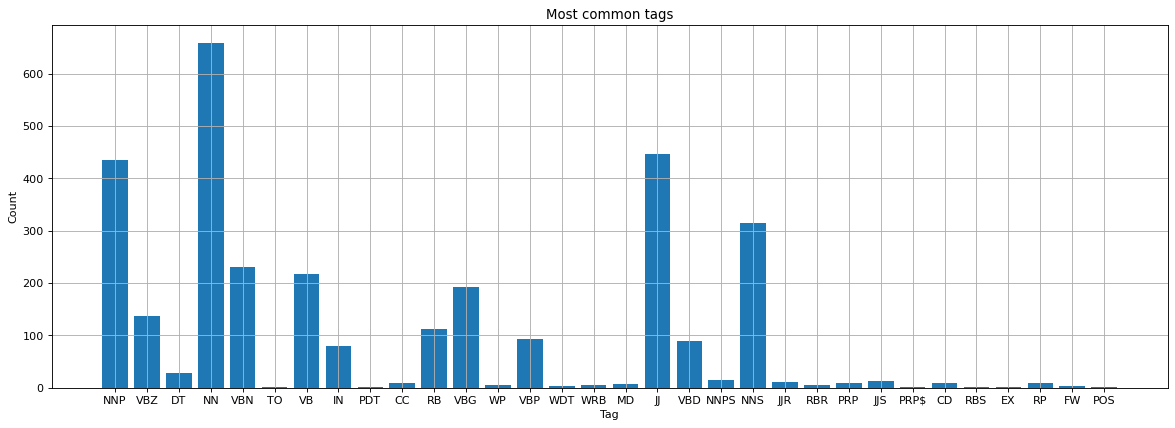

In [ ]:
##Most Common tag
figure(figsize=(18,6), dpi=80)
plt.grid()
plt.bar(list(df_posTag.keys()), [len(df_posTag[key]) for key in df_posTag.keys()])
plt.xlabel("Tag")
plt.ylabel("Count")
plt.title("Most common tags")
plt.show()

In [ ]:
#Embeddings
info = api.info()
for model_name, model_data in sorted(info['models'].items()):
    print(
        "%s (%d records): %s"%(
            model_name,
            model_data.get('num_records', -1),
            model_data['description'][:50] + '...'
        )
    )

__testing_word2vec-matrix-synopsis (-1 records): [THIS IS ONLY FOR TESTING] Word vecrors of the mov...
conceptnet-numberbatch-17-06-300 (1917247 records): ConceptNet Numberbatch consists of state-of-the-ar...
fasttext-wiki-news-subwords-300 (999999 records): 1 million word vectors trained on Wikipedia 2017, ...
glove-twitter-100 (1193514 records): Pre-trained vectors based on  2B tweets, 27B token...
glove-twitter-200 (1193514 records): Pre-trained vectors based on 2B tweets, 27B tokens...
glove-twitter-25 (1193514 records): Pre-trained vectors based on 2B tweets, 27B tokens...
glove-twitter-50 (1193514 records): Pre-trained vectors based on 2B tweets, 27B tokens...
glove-wiki-gigaword-100 (400000 records): Pre-trained vectors based on Wikipedia 2014 + Giga...
glove-wiki-gigaword-200 (400000 records): Pre-trained vectors based on Wikipedia 2014 + Giga...
glove-wiki-gigaword-300 (400000 records): Pre-trained vectors based on Wikipedia 2014 + Giga...
glove-wiki-gigaword-50 (400000 record

In [ ]:
wv = api.load("word2vec-google-news-300")
glove = api.load("glove-wiki-gigaword-50")

In [ ]:
mtx_tags = {}
for key in df_posTag.keys():
    if key != "DT" and key != "TO" and (key not in ["VB"]) and key != "IN" and key != "CC" and (key not in ["RB", "RBR", "RBS"]):
        sim_mtx = []
        for i in tqdm(range(len(df_posTag[key]))):
            line = []
            for j in range(len(df_posTag[key])):
                line.append(wv.similarity(df_posTag[key][i], df_posTag[key][j]))
            sim_mtx.append(line)
        sim_mtx = np.array(sim_mtx)
        mtx_tags[key]=sim_mtx
    elif key == "VB":
        sim_mtx = []
        for i in tqdm(range(len(df_posTag[key]))):
            line = []
            for j in range(len(df_posTag[key])):
                line.append(glove.similarity(df_posTag[key][i], df_posTag[key][j]))
            sim_mtx.append(line)
        sim_mtx = np.array(sim_mtx)
        mtx_tags[key]=sim_mtx

100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


In [ ]:
# df.to_json("Data/Clean_Database.json")

In [ ]:
##Heatmap for synonyms
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
dfs_sim = {}
for key in mtx_tags.keys():
    dfs_sim[key] = pd.DataFrame(mtx_tags[key], index=df_posTag[key], columns=df_posTag[key])

In [ ]:
dfs_sim.keys()

dict_keys(['NNP', 'VBZ', 'NN', 'VBN', 'VB', 'PDT', 'VBG', 'WP', 'VBP', 'WDT', 'WRB', 'MD', 'JJ', 'VBD', 'NNPS', 'NNS', 'JJR', 'PRP', 'JJS', 'PRP$', 'CD', 'EX', 'RP', 'FW', 'POS'])